#2η ατομική εργασία στη Τεχνολογία και Ανάλυση Εικόνων και Βίντεο

# Θεωρητικό Μέρος

Με βάση τα άρθρα και τις αντίστοιχες υλοποιήσεις που μου δόθηκαν, κατασκευάζω τον παρακάτω συγκριτικό πίνακα.

|  | LeNet            | AlexNet | VGG |
|-------|-----------------|-------------|-------------|
|Επίπεδα | 6  | 8       |  11   |
|Μέγεθος Φίλτρων  | 5x5    |11x11, 5x5, 3x3        | 3x3  |
|Συνάρτηση Ενεργοποιήσης  | Sigmoid   | ReLU        | ReLU  |
|Πλήθος Παραμέτρων | 2578    | 60 million     |    133 million  |
| Pooling | average pooling | max pooling        | max pooling  |
| Dropout | -  | p=0.5      | p=0.5           |


Σύμφωνα με το δοσμένο άρθρο για το VGG, υπάρχουν 5 διαφορετικές παραλλαγές του VGG μοντέλου. Σε κάθε μια από αυτές, ο αριθμός των παραμέτρων αλλάζει. Στην δοσμένη υλοποίηση, αναλύεται το VGG-11 ή αλλιώς VGG-A το οποίο έχει 11 επίπεδα και 133Μ παραμέτρους.




**LeNet:** Είναι από τα πρώτα συνελικτικά νευρωνικά δίκτυα που σχεδιάστηκε για αναγνώριση χειρόγραφων ψηφίων.


**AlexNet:**  Είναι βαθύτερο από το LeNet και εισήγαγε τεχνικές όπως ReLU, dropout και χρήση πολλαπλών GPUs για εκπαίδευση. Έτσι, τα σφάλματα μειώθηκαν σε σύγκριση με τις παραδοσιακές μεθόδους.

**VGG:** Xρησιμοποιεί μόνο 3x3 συνελικτικά φίλτρα και 2x2 max pooling σε μια βαθιά, επαναλαμβανόμενη δομή.

# Υλοποίηση Αλγορίθμου


## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)


In [3]:
# load the entire dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας.

In [5]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 128

In [6]:
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"

In [7]:
print(cifar100_classes_url)


https://pastebin.com/raw/nzE1n98V


Δημιουργούμε το μοναδικό dataset της ομάδας μας:

Άλλαξα τον τρόπο που έγινε η ανάκτηση του dataset, καθώς μου δημιουργήθηκε HTTP error: forbidden.

In [8]:
import requests
from io import StringIO
import pandas as pd

# Manually set the URL
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"

# Add a browser-like user-agent header
headers = {'User-Agent': 'Mozilla/5.0'}

# Request the data
response = requests.get(cifar100_classes_url, headers=headers)

# Load it into pandas from memory
team_classes = pd.read_csv(StringIO(response.text), sep=',', header=None)

labels_url = 'https://pastebin.com/raw/qgDaNggt'
headers = {'User-Agent': 'Mozilla/5.0'}

# Request and load the label list
response = requests.get(labels_url, headers=headers)
CIFAR100_LABELS_LIST = pd.read_csv(StringIO(response.text), sep=',', header=None).astype(str).values.tolist()[0]


In [9]:

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [10]:
# print our classes
print(our_classes)
print(our_index)

['apple', ' bee', ' chair', ' clock', ' cockroach', ' crab', ' kangaroo', ' lamp', ' maple_tree', ' otter', ' pear', ' plain', ' raccoon', ' ray', ' road', ' skunk', ' spider', ' table', ' tank', ' worm']
[0, 6, 20, 22, 24, 26, 38, 40, 47, 55, 57, 60, 66, 67, 68, 75, 79, 84, 85, 99]


In [11]:
print(x_train_ds[1].shape)

(32, 32, 3)


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


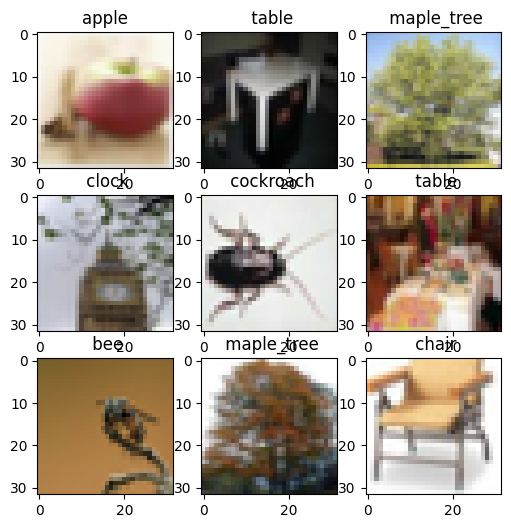

In [12]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

## Ερώτημα 1
---
### Βήμα 1: Σχεδίαση και εκπαίδευση των μοντέλων

 Σχεδίαστε και εκπαιδεύστε τα μοντέλα  **LeNet, AlexNet και  VGG**, καθώς και ένα δικό σας μοντέλο (ονομάστε το π.χ. **MyCNN**) χρησιμοποιώντας τον ίδιο αλγορίθμο βελτιστοποίησης ([optimizer](https://keras.io/api/optimizers/)), την ίδια συνάρτηση κόστους [loss function](https://keras.io/api/losses/), το ίδιο μέγεθος παρτίδας (batch size) και 50 εποχές (epochs) `*`.

 Για την εκτίμηση της απόδοσης των μοντέλων να χρησιμοποιήσετε ως μετρική ([metrics](https://keras.io/api/metrics/)) την F1-score.


`*`
 Μπορείτε να πειραματιστείτε με τον optimizer, την loss function και το batch size για τα 4 μοντέλα πριν καταλήξετε στην τελική σας κοινή, για όλα τα μοντέλα επιλογή.


---
  
### Βήμα 2: Αξιολόγηση των μοντέλων

α. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε στο Βήμα 1, απεικονίστε σε κοινό διάγραμμα τα F1-scores εκπαίδευσης και επικύρωσης στο σύνολο των εποχών.

β. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:
 - Επίδραση του πλήθους των δεδομένων/κλάσεων.
 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
 - Επίδραση του μεγέθους δέσμης (batch size)
---

### Βήμα 3: Αξιολόγηση F1-score
Αξιολογήστε τα F1-scores, χρησιμοποιώντας το σύνολο ελέγχου σας (test set).

---

Σύμφωνα με την εκφώνηση, θα χρησιμοποιήσω το F1 score ως μετρική για την αξιολόγηση των μοντέλων μου. Για αυτό, θα δημιουργήσω την δικιά μου συνάρτηση F1-score.

In [13]:
from tensorflow.keras import backend as K
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name='tp', initializer='zeros')
        self.false_positives = self.add_weight(name='fp', initializer='zeros')
        self.false_negatives = self.add_weight(name='fn', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = K.cast(y_true, 'int32')
        y_pred = tf.math.argmax(y_pred, axis=1)
        y_pred = K.cast(y_pred, 'int32')

        tp = K.sum(K.cast(y_true == y_pred, 'float32'))
        fp = K.sum(K.cast(y_true != y_pred, 'float32'))
        fn = K.sum(K.cast(K.greater(y_true, y_pred), 'float32'))

        self.true_positives.assign_add(tp)
        self.false_positives.assign_add(fp)
        self.false_negatives.assign_add(fn)

    def result(self):
        precision = self.true_positives / (self.true_positives + self.false_positives + K.epsilon())
        recall = self.true_positives / (self.true_positives + self.false_negatives + K.epsilon())
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

    def reset_states(self):
        self.true_positives.assign(0)
        self.false_positives.assign(0)
        self.false_negatives.assign(0)

In [14]:
print("Unique labels in training set:", np.unique(y_train))
print("Unique labels in validation set:", np.unique(y_val))
print("Unique labels in test set:", np.unique(y_test))

Unique labels in training set: [ 0  6 20 22 24 26 38 40 47 55 57 60 66 67 68 75 79 84 85 99]
Unique labels in validation set: [ 0  6 20 22 24 26 38 40 47 55 57 60 66 67 68 75 79 84 85 99]
Unique labels in test set: [ 0  6 20 22 24 26 38 40 47 55 57 60 66 67 68 75 79 84 85 99]


Ορίζω ένα λεξικό αντιστοίχισης το οποίο θα μετατρέψει τις ετικέτες ( labels ) σε συνεχόμενα νούμερα από το 0 έως το 19.

In [15]:
dictionary = {
    0:0,
    6:1,
    20:2,
    22:3,
    24:4,
    26:5,
    38:6,
    40:7,
    47:8,
    55:9,
    57:10,
    60:11,
    66:12,
    67:13,
    68:14,
    75:15,
    79:16,
    84:17,
    85:18,
    99:19
  }
for i in range(len(y_train)):
  y_train[i][0] = dictionary[y_train[i][0]]

for i in range(len(y_val)):
  y_val[i][0] = dictionary[y_val[i][0]]

for i in range(len(y_test)):
  y_test[i][0] = dictionary[y_test[i][0]]


Η LeNet που μου δόθηκε ήταν για ταυτοποίηση ψηφίων. Τώρα, θα την χρησιμοποιήσω για classification εικόνων και για αυτόν τον λόγο θα αλλάξω το input shape σε 28x28x3. Το LeNet είναι σχεδιασμένο για πιο μικές φωτογραφίες των 28 pixels.

In [16]:
x_train28=tf.image.resize(x_train,(28,28))
x_val28=tf.image.resize(x_val,(28,28))
x_test28=tf.image.resize(x_test,(28,28))

In [17]:
def LeNet():
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid',
                               padding='same', input_shape=(28, 28, 3)),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=16, kernel_size=5,
                               activation='sigmoid'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='sigmoid'),
        tf.keras.layers.Dense(84, activation='sigmoid'),
        tf.keras.layers.Dense(20)])

In [18]:
LeNet_model = LeNet()
LeNet_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │         1,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,856 (245.53 KB)

 Trainable params: 62,856 (245.53 KB)

 Non-trainable params: 0 (0.00 B)

Θα εκπαιδεύσω το μοντέλο μου χρησιμοποιώντας τα εξής:
1. Epochs = 50
2. Batch size = 64
3. Loss function = SparseCategoricalCrossentropy
4. Optimizer = Adam


In [20]:
LeNet1 = LeNet()

LeNet1.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=[F1Score()])

LeNet1_hist = LeNet1.fit(x_train28, y_train,
                         epochs=20, batch_size=64,
                         validation_data=(x_val28, y_val))

Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - f1_score: 0.0698 - loss: 3.0352 - val_f1_score: 0.0611 - val_loss: 2.9988
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.0660 - loss: 3.0000 - val_f1_score: 0.0634 - val_loss: 2.9211
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.0633 - loss: 2.8534 - val_f1_score: 0.0656 - val_loss: 2.6385
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.0676 - loss: 2.5967 - val_f1_score: 0.0704 - val_loss: 2.4718
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.0697 - loss: 2.4301 - val_f1_score: 0.0685 - val_loss: 2.3723
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.0655 - loss: 2.3716 - val_f1_score: 0.0720 - val_loss: 2.3141
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.0689 - loss: 2.2973 - val_f1_score: 0.0725 - val_loss: 2.2585
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.0696 - loss: 2.2656 - val_f1_score: 0

Στην συνέχεια θα πειραματιστώ με τον optimizer adamax.
Τρέχω για 20 epochs για οικονομία πόρων.

In [21]:
LeNet2 = LeNet()

LeNet2.compile(optimizer='adamax',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=[F1Score()])

LeNet2_hist = LeNet2.fit(x_train28, y_train,
                         epochs=20, batch_size=64,
                         validation_data=(x_val28, y_val))

Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - f1_score: 0.0688 - loss: 3.0234 - val_f1_score: 0.0572 - val_loss: 3.0001
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1_score: 0.0632 - loss: 2.9999 - val_f1_score: 0.0869 - val_loss: 2.9914
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.0621 - loss: 2.9938 - val_f1_score: 0.0546 - val_loss: 2.9828
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.0599 - loss: 2.9632 - val_f1_score: 0.0526 - val_loss: 2.8968
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.0596 - loss: 2.8718 - val_f1_score: 0.0551 - val_loss: 2.8118
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.0610 - loss: 2.7902 - val_f1_score: 0.0626 - val_loss: 2.7475
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.0627 - loss: 2.7192 - val_f1_score: 0.0632 - val_loss: 2.6724
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.0644 - loss: 2.6591 - val_f1_score: 0

Θα δοκιμάσω τώρα να αλλάξω το batch size, διατηρώντας τα υπόλοιποα σταθερά.


In [22]:
LeNet3 = LeNet()

LeNet3.compile(optimizer='adamax',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=[F1Score()])

LeNet3_hist = LeNet3.fit(x_train28, y_train,
                         epochs=20, batch_size=128,
                         validation_data=(x_val28, y_val))

Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - f1_score: 0.0547 - loss: 3.0308 - val_f1_score: 0.0617 - val_loss: 3.0024
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.0781 - loss: 2.9969 - val_f1_score: 0.0630 - val_loss: 2.9976
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.0672 - loss: 2.9987 - val_f1_score: 0.0566 - val_loss: 2.9990
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.0596 - loss: 2.9962 - val_f1_score: 0.0943 - val_loss: 2.9917
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1_score: 0.0767 - loss: 2.9887 - val_f1_score: 0.0747 - val_loss: 2.9780
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.0607 - loss: 2.9706 - val_f1_score: 0.0658 - val_loss: 2.9445
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1_score: 0.0571 - loss: 2.9361 - val_f1_score: 0.0532 - val_loss: 2.8997
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.0593 - loss: 2.8884 - val_f1_score: 0.0686 - val_loss

Το AlexNet αποτελείται από 5 συνελικτικά επίπεδα (conv2d) και 2 fully connected επίπεδα.

Αντίθετα από την LeNet, η AlexNet δέχεται input 224x224 και για αυτό κάνουμε το εξής resize:

In [23]:
x_train_224 = tf.image.resize(x_train, (224, 224))
x_val_224 = tf.image.resize(x_val, (224, 224))
x_test_224 = tf.image.resize(x_test, (224, 224))

In [24]:
def AlexNet():
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4,
                               activation='relu'), ##1st conv: 11x11
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Conv2D(filters=256, kernel_size=5, padding='same',
                               activation='relu'), ##2nd conv:5x5
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same',
                               activation='relu'), ##3rd conv: 3x3
        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same',
                               activation='relu'),  ##4th conv: 3x3
        tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',
                               activation='relu'),  ##5th conv: 3x3
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),  #1st fully connected
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096, activation='relu'),  #2nd fully connected
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(20) #3rd fully connected
    ])
AlexNet_model = AlexNet()
AlexNet_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Όπως και πριν θα εκπαιδεύσω το μοντέλο με
1. Epochs = 20 ( για οικονομια πόρων )
2. Batch size = 64
3. Loss function = SparseCategoricalCrossentropy
4. Optimizer = Adam

In [25]:
AlexNet1 = AlexNet()

AlexNet1.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=[F1Score()])

AlexNet1_hist = AlexNet1.fit(x_train_224, y_train,
                         epochs=20, batch_size=64,
                         validation_data=(x_val_224, y_val))

Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 37s 170ms/step - f1_score: 0.0593 - loss: 3.0547 - val_f1_score: 0.0467 - val_loss: 2.9973
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - f1_score: 0.0709 - loss: 2.9964 - val_f1_score: 0.0467 - val_loss: 2.9976
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - f1_score: 0.0623 - loss: 2.9958 - val_f1_score: 0.0657 - val_loss: 2.9970
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - f1_score: 0.0598 - loss: 2.9960 - val_f1_score: 0.0505 - val_loss: 2.9968
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - f1_score: 0.0655 - loss: 2.9959 - val_f1_score: 0.0467 - val_loss: 2.9971
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - f1_score: 0.0646 - loss: 2.9959 - val_f1_score: 0.0467 - val_loss: 2.9972
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - f1_score: 0.0683 - loss: 2.9959 - val_f1_score: 0.0619 - val_loss: 2.9974
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - f1_score: 0.0727 - loss: 2.9956 -

Θα πειραματιστώ με τον Adamax optimizer.

In [26]:
AlexNet2 = AlexNet()

AlexNet2.compile(optimizer='adamax',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=[F1Score()])

AlexNet2_hist = AlexNet2.fit(x_train_224, y_train,
                         epochs=20, batch_size=64,
                         validation_data=(x_val_224, y_val))

Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - f1_score: 0.0570 - loss: 3.2875 - val_f1_score: 0.0608 - val_loss: 2.8717
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - f1_score: 0.0668 - loss: 2.7559 - val_f1_score: 0.0685 - val_loss: 2.2970
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - f1_score: 0.0689 - loss: 2.2658 - val_f1_score: 0.0708 - val_loss: 1.9947
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - f1_score: 0.0715 - loss: 1.9497 - val_f1_score: 0.0742 - val_loss: 1.7805
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - f1_score: 0.0737 - loss: 1.7836 - val_f1_score: 0.0744 - val_loss: 1.6845
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - f1_score: 0.0757 - loss: 1.5978 - val_f1_score: 0.0751 - val_loss: 1.6072
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - f1_score: 0.0751 - loss: 1.4654 - val_f1_score: 0.0787 - val_loss: 1.6501
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - f1_score: 0.0782 - loss: 1.3303 -

Τώρα, θα υλοποιήσω το VGG11 το οποίο περιλαμβάνει

In [27]:
#num_convs--> συνελτικά layers
#num_channels--> φίλτρα σε κάθε conv2D
def vgg_block(num_convs, num_channels):
    blk = tf.keras.models.Sequential()
    for _ in range(num_convs):
        blk.add(tf.keras.layers.Conv2D(num_channels,kernel_size=3,
                                    padding='same',activation='relu'))  #3x3 conv filters
    blk.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))  #maxpooling: μειώνει το μέγεθος (διαστάσεις) των εικόνων ή των χαρακτηριστικών (feature maps) που έχουν εξαχθεί από τα συνελικτικά φίλτρα.
    return blk
def vgg(conv_arch):
    net = tf.keras.models.Sequential()
    # The convulational part
    for (num_convs, num_channels) in conv_arch:
        net.add(vgg_block(num_convs, num_channels))
    net.add(tf.keras.models.Sequential([   ##fully conected κεφαλή: flatten->2 dense -> output
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(20)]))
    return net

conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))  #vgg11
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]

In [28]:
VGG1=vgg(small_conv_arch)
VGG1.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=[F1Score()])

VGG1_hist = VGG1.fit(x_train_224, y_train,
                         epochs=20, batch_size=64,
                         validation_data=(x_val_224, y_val))

Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 38s 184ms/step - f1_score: 0.0587 - loss: 2.9452 - val_f1_score: 0.0622 - val_loss: 2.5635
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - f1_score: 0.0657 - loss: 2.4070 - val_f1_score: 0.0718 - val_loss: 2.0325
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - f1_score: 0.0695 - loss: 2.0185 - val_f1_score: 0.0742 - val_loss: 1.8451
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - f1_score: 0.0726 - loss: 1.7875 - val_f1_score: 0.0749 - val_loss: 1.6987
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - f1_score: 0.0748 - loss: 1.5237 - val_f1_score: 0.0765 - val_loss: 1.5891
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - f1_score: 0.0767 - loss: 1.2837 - val_f1_score: 0.0762 - val_loss: 1.5508
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - f1_score: 0.0781 - loss: 1.0829 - val_f1_score: 0.0787 - val_loss: 1.6087
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - f1_score: 0.0794 - loss: 0.8556 -

In [29]:
VGG2=vgg(small_conv_arch)
VGG2.compile(optimizer='adamax',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=[F1Score()])

VGG2_hist = VGG2.fit(x_train_224, y_train,
                         epochs=20, batch_size=64,
                         validation_data=(x_val_224, y_val))

Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 25s 134ms/step - f1_score: 0.0593 - loss: 3.0056 - val_f1_score: 0.0668 - val_loss: 2.5635
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - f1_score: 0.0669 - loss: 2.4468 - val_f1_score: 0.0701 - val_loss: 2.1199
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - f1_score: 0.0700 - loss: 2.0890 - val_f1_score: 0.0738 - val_loss: 1.8471
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step - f1_score: 0.0727 - loss: 1.7969 - val_f1_score: 0.0746 - val_loss: 1.6710
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - f1_score: 0.0746 - loss: 1.6188 - val_f1_score: 0.0759 - val_loss: 1.5567
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - f1_score: 0.0764 - loss: 1.4679 - val_f1_score: 0.0761 - val_loss: 1.4447
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - f1_score: 0.0768 - loss: 1.2622 - val_f1_score: 0.0750 - val_loss: 1.4544
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - f1_score: 0.0781 - loss: 1.1151 -

Tο δικό μου μοντέλο, DimCNN θα έχει 4 conv επίπεδα και 3 fully connected. Επίσης θα χρησιμοποιήσω και dropout περισσότερες φορές και με διαφορετικές πιθανότητες, προκειμένου να μειωθεί το overfitting. Θα χρησιμοποιήσω activation function = relu και kernel 5x5 αρχικά και στην συνέχεια 3x3.

In [30]:
def DimCNN():
    return  tf.keras.Sequential([
        tf.keras.layers.Conv2D(96, kernel_size=5, strides=2, activation='relu', input_shape=(32, 32, 3)),  # 1st conv: 5x5
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Conv2D(256, kernel_size=5, padding='same', activation='relu'),  # 2nd conv: 5x5
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),  # 3rd conv: 3x3
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),  # 4th conv: 3x3
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),  # 1st FC
        tf.keras.layers.Dense(4096, activation='relu'),  # 2nd FC
        tf.keras.layers.Dense(20)  # Output layer: 20 classes
    ])


DimCNN1 = DimCNN()


In [31]:
my_model = DimCNN()
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[F1Score()])

my_model_hist = my_model.fit(x_train, y_train,
                         epochs=20, batch_size=64,
                         validation_data=(x_val, y_val))


Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - f1_score: 0.0644 - loss: 2.9575 - val_f1_score: 0.0549 - val_loss: 2.7437
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - f1_score: 0.0632 - loss: 2.6722 - val_f1_score: 0.0688 - val_loss: 2.4761
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - f1_score: 0.0669 - loss: 2.4066 - val_f1_score: 0.0753 - val_loss: 2.2539
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - f1_score: 0.0709 - loss: 2.2189 - val_f1_score: 0.0744 - val_loss: 2.1423
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - f1_score: 0.0717 - loss: 2.0782 - val_f1_score: 0.0739 - val_loss: 2.0231
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - f1_score: 0.0715 - loss: 1.9536 - val_f1_score: 0.0715 - val_loss: 1.8593
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - f1_score: 0.0733 - loss: 1.7968 - val_f1_score: 0.0719 - val_loss: 1.8527
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - f1_score: 0.0730 - loss: 1.6998 - val_f1_

In [32]:
my_model2 = DimCNN()
my_model2.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[F1Score()])

my_model2_hist = my_model2.fit(x_train, y_train,
                         epochs=20, batch_size=64,
                         validation_data=(x_val, y_val))


Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - f1_score: 0.0579 - loss: 2.9588 - val_f1_score: 0.0585 - val_loss: 2.6035
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - f1_score: 0.0645 - loss: 2.4982 - val_f1_score: 0.0716 - val_loss: 2.2862
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - f1_score: 0.0711 - loss: 2.2197 - val_f1_score: 0.0743 - val_loss: 2.1210
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - f1_score: 0.0686 - loss: 2.0721 - val_f1_score: 0.0714 - val_loss: 1.9756
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - f1_score: 0.0705 - loss: 1.8626 - val_f1_score: 0.0754 - val_loss: 1.8192
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - f1_score: 0.0723 - loss: 1.6845 - val_f1_score: 0.0760 - val_loss: 1.8046
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - f1_score: 0.0731 - loss: 1.5590 - val_f1_score: 0.0761 - val_loss: 1.6339
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - f1_score: 0.0743 - loss: 1.3857 - val_f1_

# Βήμα 2


Για κάθε μοντέλο έχω φτιάξει 2 διαφορετικές εκδοχές αλλάζοντας τον optimizer. Θα κατασκευάσω το διάγραμμα του training F1-Score και του Validation F1-score.


Το training F1 score δείχνει πόσο καλά έμαθε το μοντέλο τα δεδομένα εκπαίδευσης, ενώ το validation F1 score δείχνει πόσο καλά το μοντέλο γενικεύει σε δεδομένα που δεν έχει δει.

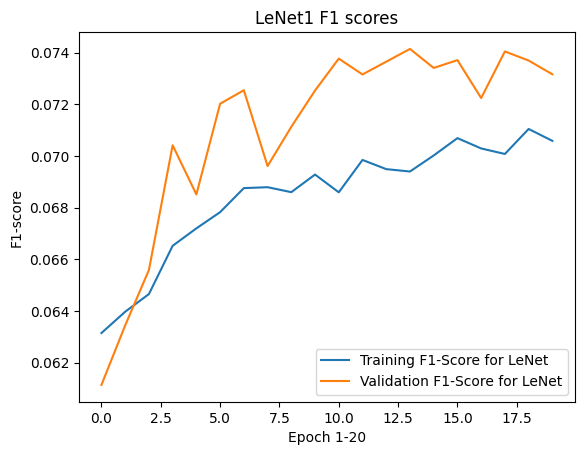

In [33]:
plt.title("LeNet1 F1 scores")
plt.plot(LeNet1_hist.history['f1_score'], label='Training F1-Score for LeNet')
plt.plot(LeNet1_hist.history['val_f1_score'], label='Validation F1-Score for LeNet')
plt.xlabel('Epoch 1-20')
plt.ylabel('F1-score')
plt.legend(loc='lower right')
plt.show()

Παρατηρούμε ότι σε πολλές περιοχές  η πορτοκαλί γραμμή (validation) βρίσκεται πάνω από τη μπλε. Αυτό σημαίνει ότι το μοντέλο γενικεύει καλά — δηλαδή, αποδίδει καλύτερα στα δεδομένα που δεν έχει ξαναδεί.

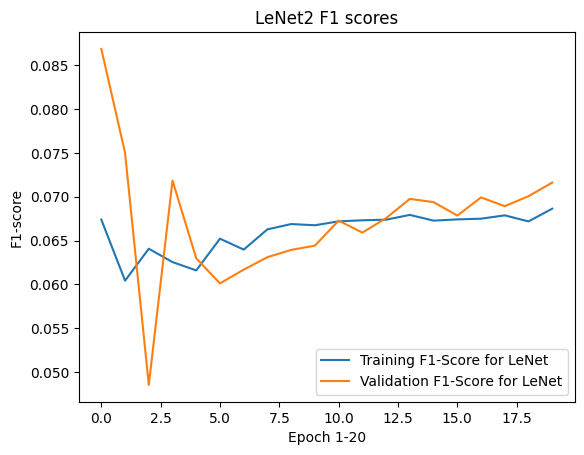

In [ ]:
plt.title("LeNet2 F1 scores")
plt.plot(LeNet2_hist.history['f1_score'], label='Training F1-Score for LeNet')
plt.plot(LeNet2_hist.history['val_f1_score'], label='Validation F1-Score for LeNet')
plt.xlabel('Epoch 1-20')
plt.ylabel('F1-score')
plt.legend(loc='lower right')
plt.show()

Παρατηρώ ότι τώρα έχουμε χαμηλότερο F1 score και μικρότερη ανοδική πορεία, γεγονός που δείχνει ότι ο optimizer Adamax δεν συγκλίνει τόσο καλά όσο ο Adam.

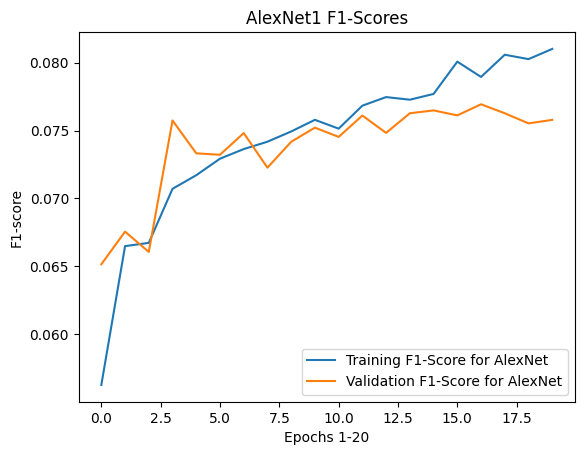

In [ ]:
plt.title("AlexNet1 F1-Scores")
plt.plot(AlexNet1_hist.history['f1_score'], label='Training F1-Score for AlexNet')
plt.plot(AlexNet1_hist.history['val_f1_score'], label='Validation F1-Score for AlexNet')
plt.xlabel('Epochs 1-20')
plt.ylabel('F1-score')
plt.legend(loc='lower right')
plt.show()

Το μοντέλο AlexNet1 μαθαίνει σωστά, αλλά πιθανώς φτάνει γρήγορα σε "ταβάνι" απόδοσης στο validation set, αφού το validation f1-socre δεν βελτιώνεται σημαντικά με την πάροδο των εποχών.

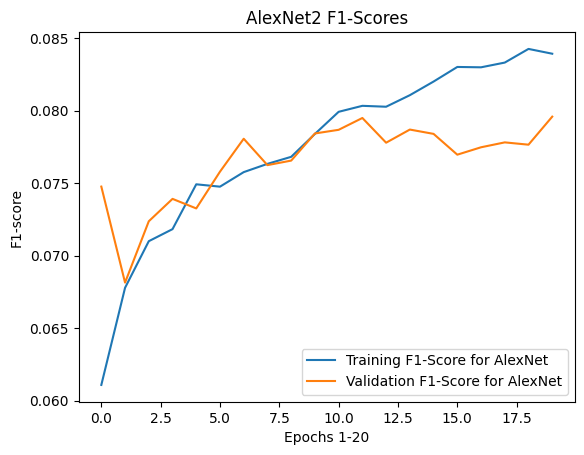

In [ ]:
plt.title("AlexNet2 F1-Scores")
plt.plot(AlexNet2_hist.history['f1_score'], label='Training F1-Score for AlexNet')
plt.plot(AlexNet2_hist.history['val_f1_score'], label='Validation F1-Score for AlexNet')
plt.xlabel('Epochs 1-20')
plt.ylabel('F1-score')
plt.legend(loc='lower right')
plt.show()

Εδώ, τόσο το training όσο και το validation F1-score αυξάνονται σταθερά. Η απόσταση μεταξύ των δύο καμπυλών παραμένει μικρή, δείχνοντας ότι δεν υπάρχει overfitting. Άρα εδώ ο adamax optimizer βελτίωσε την συνολική απόδοση του μοντέλου.

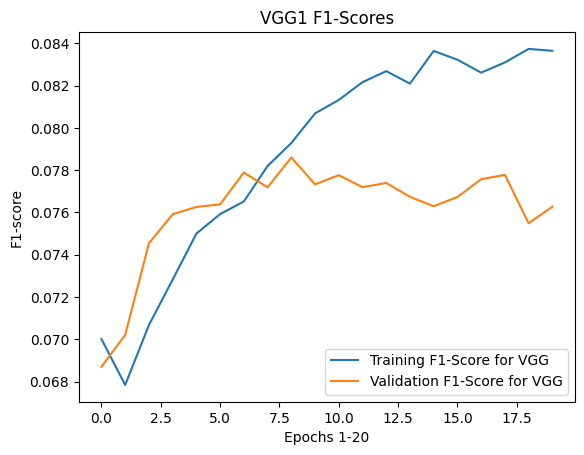

In [ ]:
plt.title("VGG1 F1-Scores")
plt.plot(VGG1_hist.history['f1_score'], label='Training F1-Score for VGG')
plt.plot(VGG1_hist.history['val_f1_score'], label='Validation F1-Score for VGG')
plt.xlabel('Epochs 1-20')
plt.ylabel('F1-score')
plt.legend(loc='lower right')
plt.show()

Παρατηρώ ότι, το validation F1-score αυξάνεται στις πρώτες εποχές αλλά στη συνέχεια σταθεροποιείται και έχει μικρή πτώση (παραμένει κοντά στο 0.077). Παράλληλα, υπάρχει διαφορά ανάμεσα στο training και validation score από τη μέση των εποχών και μετά, γεγονός που υποδηλώνει overfitting,  αφού η απόδοση στο validation set δεν βελτιώνεται άλλο και δείχνει μικρή πτώση.

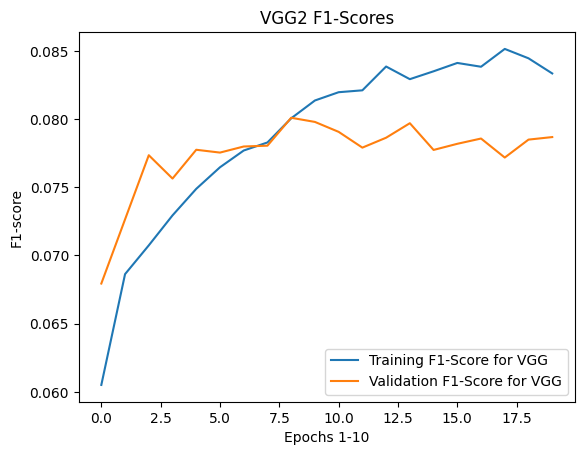

In [ ]:
plt.title("VGG2 F1-Scores")
plt.plot(VGG2_hist.history['f1_score'], label='Training F1-Score for VGG')
plt.plot(VGG2_hist.history['val_f1_score'], label='Validation F1-Score for VGG')
plt.xlabel('Epochs 1-10')
plt.ylabel('F1-score')
plt.legend(loc='lower right')
plt.show()

Αντίθετα, εδώ τόσο το training όσο και το validation f1-score αυξάνονται σταθερά και παραμένουν κοντά μέχρι το τέλος. Η συμπεριφορά είναι σταθερή και ομαλή και δεν δείχνι σημάδια overfitting.

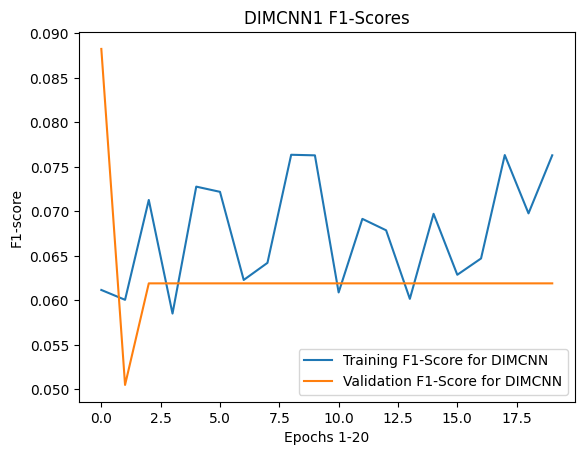

In [ ]:
plt.title("DIMCNN1 F1-Scores")
plt.plot(my_model_hist.history['f1_score'], label='Training F1-Score for DIMCNN')
plt.plot(my_model_hist.history['val_f1_score'], label='Validation F1-Score for DIMCNN')
plt.xlabel('Epochs 1-20')
plt.ylabel('F1-score')
plt.legend(loc='lower right')
plt.show()

Το μοντέλο DimCNN1 δεν μαθαίνει σωστά. Το validation F1 παραμένει σταθερό, και το training είναι ασταθές, δείχνοντας ότι το δίκτυο δεν συγκλίνει.

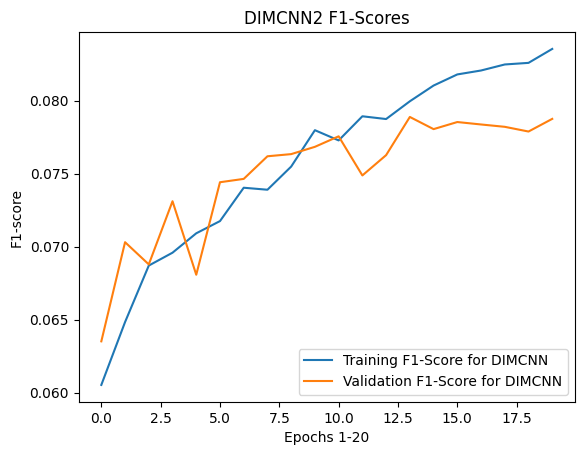

In [ ]:
plt.title("DIMCNN2 F1-Scores")
plt.plot(my_model2_hist.history['f1_score'], label='Training F1-Score for DIMCNN')
plt.plot(my_model2_hist.history['val_f1_score'], label='Validation F1-Score for DIMCNN')
plt.xlabel('Epochs 1-20')
plt.ylabel('F1-score')
plt.legend(loc='lower right')
plt.show()

Εδώ βλέπουμε εμφανή βελτίωση: και τα δυο f1-scores αυξάνονται σταθερά και οι δυο καμπύλες παραμένουν κοντά μεταξύ τους.

Optimal LeNet:
63/63 - 1s - 21ms/step - f1_score: 0.0800 - loss: 1.9820

Optimal AlexNet:
63/63 - 4s - 66ms/step - f1_score: 0.0895 - loss: 2.1348

Optimal VGG:
63/63 - 4s - 58ms/step - f1_score: 0.0878 - loss: 2.3532

Optimal MyCNN:
63/63 - 2s - 29ms/step - f1_score: 0.0877 - loss: 2.1329


Για κάθε μοντέλο θα διαλέξω την καλύτερη προσέγγιση, δηλαδή αυτή που πετυχαίνει μεγαλύτερο F1-score. Από τα παραπάνω διαγράμματα βλέπω ότι αυτά είναι τα:

1. LeNet1
2. AlexNet2
3. VGG2
4. DimCNN2

Αυτά, θα τα βάλω σε κοινό διάγραμμα για συγκεντρωτική παρουσίαση.

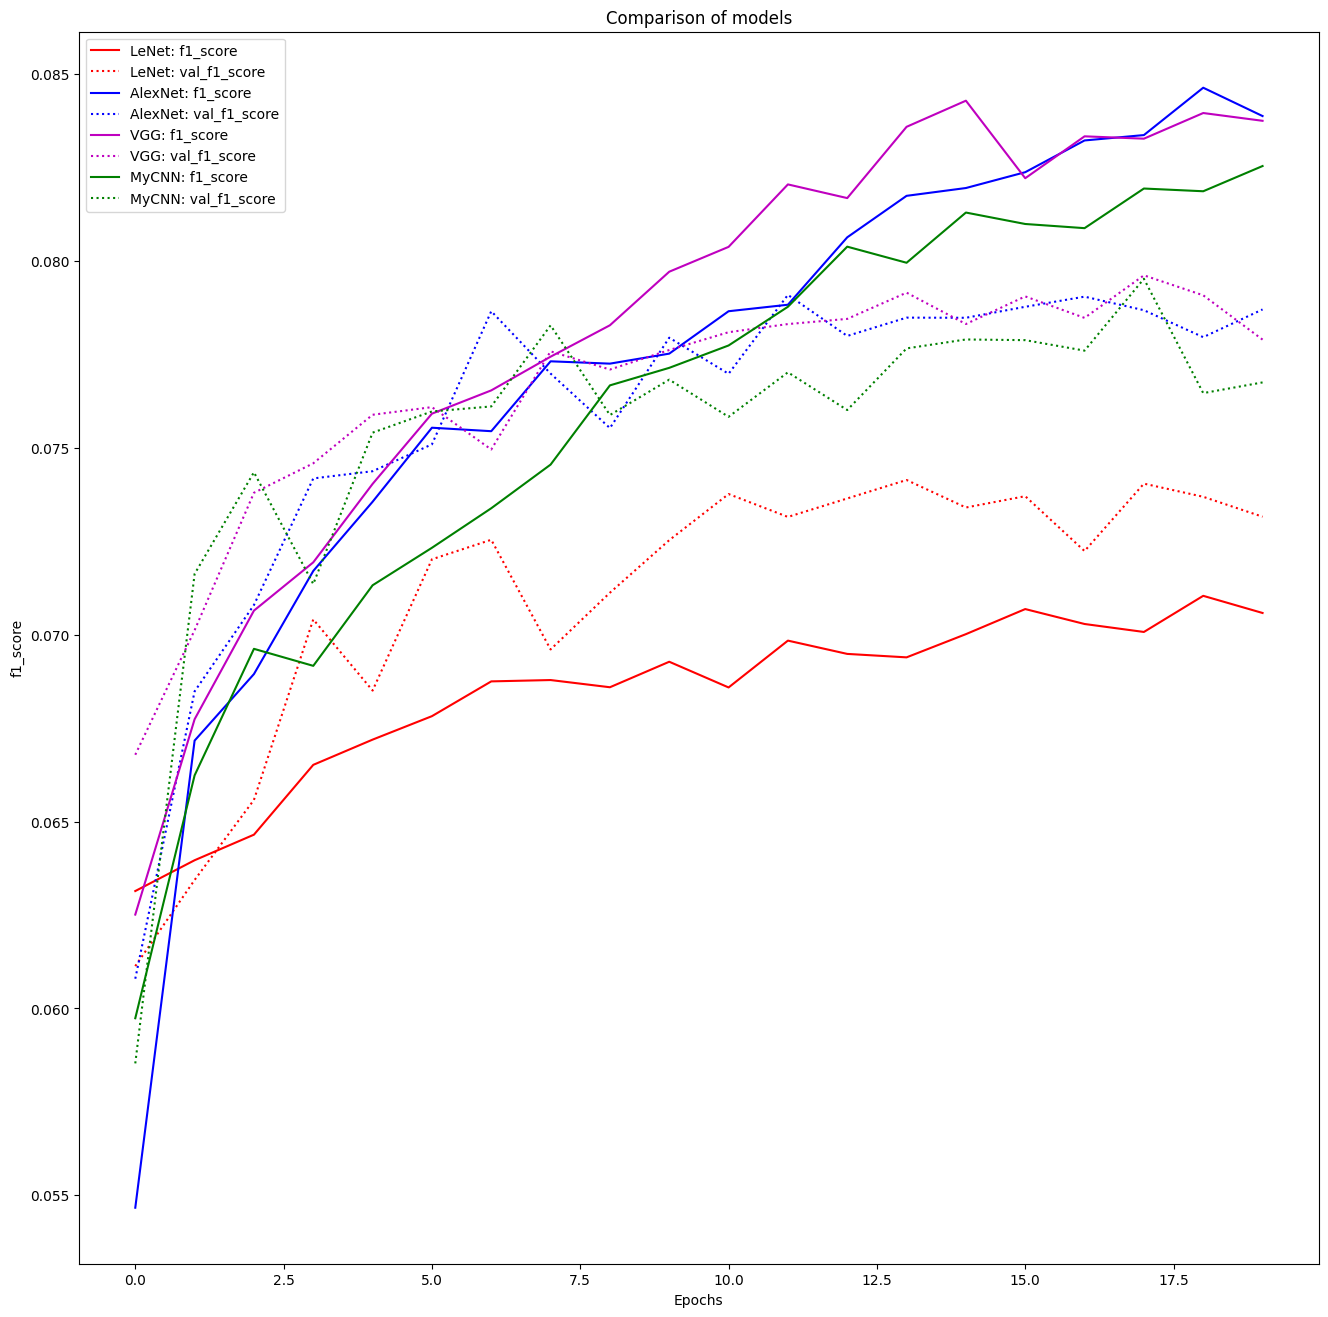

In [35]:
fig=plt.figure(figsize=(16,16))
histories=[LeNet1_hist, AlexNet2_hist, VGG2_hist, my_model2_hist]
labels=["LeNet","AlexNet","VGG","MyCNN"]
colors = ['r','b','m','g','y']
plt.title("Comparison of models")
index=0
for j in histories:
  plt.plot(j.history['f1_score'], label=labels[index]+': f1_score', color=colors[index%5])
  plt.plot(j.history['val_f1_score'], linestyle='dotted', label = labels[index] + ': val_f1_score',color=colors[index%5])
  index+=1
plt.xlabel('Epochs')
plt.ylabel('f1_score')
plt.legend(loc='upper left')


β. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:

Επίδραση του πλήθους των δεδομένων/κλάσεων.

Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)

Επίδραση του μεγέθους δέσμης (batch size)


Σχολιασμός:

1. Επίδραση του πλήθους των δεδομένων/κλάσεων.


---
Όταν προστίθενται δεδομένα, παρατηρούμε μειωμένη απόδοση του μοντέλου καθώς και μεγαλύτερη αναμονή, κατά το χρόνο εκπαιδευσης ανά εποχή. Προσθέτωντας περισσότερα δεδομένα έχουμε νέες κλάσεις και δημιουργείται ένα πιο πολύπλοκο σύστημα το οποίο χρειάζεται μεγλύτερα training sets. Αυτό αποδεικνύεται και από το γεγονός ότι το μοντέλο διαμορφώθηκε με ένα πυκνό στρώμα εξόδου για 100 κλάσεις το οποίο επιβράδυνε σημαντικά την εκπαίδευση μέχρι το μοντέλο να προσαρμοστεί σε 20 κλάσεις.


2. Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)

---

Δοκίμασα τους optimizers Adam και Adamax. Από τις παραπάνω αναλύσεις για κάθε μοντέλο είναι εμφανές ότι το δεύτερος εμφάνισε καλύτερα αποτελέσματα σχεδόν σε όλα τα μοντέλα παρόλο που οι διαφορές είναι μικρές όσον αφορά την τιμή της μετρικής.


3. Επίδραση του μεγέθους δέσμης (batch size)


---

Γενικά μικρότερα batch sizes όπως για παράδειγμα το 32, μπορεί να οδηγήσουν σε καλύτερη γενίκευση αλλά επιβραδύνουν την εκπαίδευση και κάνουν το validation F1-score πιο ασταθές.
Αντίθετα, μεγάλα batch sizes, επιταχύνουν το training αλλά έχουν τον κίνδυνο του overfitting.
Για αυτό και επέλεξα την μέση λύση που είναι το batch size = 64.


# Βήμα 3: Αξιολόγηση f1-score

In [36]:

print("Optimal LeNet:")
test_loss_lenet, test_acc_lenet = LeNet1.evaluate(x_test28, y_test, verbose=2)
print()
print("Optimal AlexNet:")
test_loss_alexnet, test_acc_alexnet = AlexNet2.evaluate(x_test_224, y_test, verbose=2)
print()
print("Optimal VGG:")
test_loss_vgg, test_acc_vgg = VGG2.evaluate(x_test_224, y_test, verbose=2)
print()
print("Optimal MyCNN:")
test_loss_mycnn, test_acc_mycnn = my_model2.evaluate(x_test, y_test, verbose=2)


Optimal LeNet:
63/63 - 0s - 3ms/step - f1_score: 0.0800 - loss: 1.9820

Optimal AlexNet:
63/63 - 1s - 22ms/step - f1_score: 0.0895 - loss: 2.1348

Optimal VGG:
63/63 - 1s - 18ms/step - f1_score: 0.0878 - loss: 2.3532

Optimal MyCNN:
63/63 - 0s - 4ms/step - f1_score: 0.0877 - loss: 2.1329


Συγκεντρώνω τα καλύτερα f1 score για κάθε μοντέλο:

LeNet--> 0.08

AlexNet--> 0.0895

VGG--> 0.0878

DimCNN-->  0.0877


Με βάση τα παραπάνω νούμερα βλέπω ότι το AlexNet έχει το υψηλότερο f1- score, ενώ πολύ κοντά βρίσκονται το DimCNN και το vgg. Το LeNet, είναι τελευταίο στην κατάταξη όπως ήταν αναμενόμενο λόγω της απλότητάς του.

Όσον αφορά το loss, το DimCNN έχει το χαμηλότερο, δηλαδή κάνει τις πιο "σίγουρες" προβλέψεις.

Τέλος, τα LeNet και MyCNN είναι σημαντικά πιο γρήγορα. Τα AlexNet και VGG έχουν μεγαλύτερο κόστος ανά βήμα (batch), λόγω μεγαλύτερου βάθους και αριθμού παραμέτρων.



## Ερώτημα 2
---
### Βήμα 1: Έλεγχος υπερεκπαίδευσης

Για μοντέλο σας  (**MyCNN**) και μόνο, δοκιμάστε διάφορους συνδυασμούς των ακόλουθων τεχνικών για τον έλεγχο της υπερεκπαίδευσης (overfitting), ώστε το μοντέλο σας να γενικεύει καλύτερα, όπως:

- Dropout ([Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout))

- Επαύξηση δεδομένων ([Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator))

---
### Βήμα 2: Αξιολόγηση
Αξιολογήστε τα αποτελέσματά σας, βάσει του F1 score για το σύνολο επικύρωσης και για το σύνολο ελέγχου

---


Για τον σκοπό αυτό, θα φτιάξω 2 μοντέλα.
Αρχικά θα φτιάξω ένα με την τεχνική Dropout.

Τι κάνει το dropout: Απενεργοποιεί τυχαία νευρώνες κατά την εκπαίδευση. Έτσι, το μοντέλο δεν βασίζεται υπερβολικά σε συγκεκριμένους νευρώνες και αποφεύγεται το overfitting.


In [ ]:
def DimCNN_drop():
     return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(96, kernel_size=5, strides=2, activation='relu', input_shape=(32, 32, 3)),  # 1st conv: 5x5
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Conv2D(256, kernel_size=5, padding='same', activation='relu'),  # 2nd conv: 5x5
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),  # 3rd conv: 3x3
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),  # 4th conv: 3x3
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),  # 1st FC
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),  # 2nd FC
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(20)  # Output layer: 20 classes
    ])

DimCNN_1 = DimCNN_drop()
DimCNN1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 14, 14, 96)     │         7,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 2, 2, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 2, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 2, 2, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 2, 2, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4096)           │     6,295,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 20)             │        81,940 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,993,364 (99.16 MB)

 Trainable params: 25,993,364 (99.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
DimCNN_drop1 = DimCNN_drop()

DimCNN_drop1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[F1Score()])

DimCNN_drop1_hist = DimCNN_drop1.fit(x_train, y_train,
                    epochs=30, batch_size=64,validation_data=(x_val, y_val))

Epoch 1/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - f1_score: 0.0609 - loss: 2.9812 - val_f1_score: 0.0668 - val_loss: 2.8500
Epoch 2/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - f1_score: 0.0671 - loss: 2.8593 - val_f1_score: 0.0548 - val_loss: 2.7371
Epoch 3/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - f1_score: 0.0657 - loss: 2.7003 - val_f1_score: 0.0626 - val_loss: 2.4755
Epoch 4/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - f1_score: 0.0682 - loss: 2.5120 - val_f1_score: 0.0739 - val_loss: 2.2865
Epoch 5/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - f1_score: 0.0688 - loss: 2.3207 - val_f1_score: 0.0732 - val_loss: 2.1526
Epoch 6/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - f1_score: 0.0681 - loss: 2.2422 - val_f1_score: 0.0737 - val_loss: 2.0784
Epoch 7/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - f1_score: 0.0693 - loss: 2.1552 - val_f1_score: 0.0763 - val_loss: 2.0111
Epoch 8/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - f1_score: 0.0713 - loss: 2.0813 - val_f1_score: 

Το 2ο μοντέλο που θα φτιάξω, θα χρησιμοποιεί data augmentation.

Τι κάνει το data augmentation: Δημιουργεί παραλλαγές των εικόνων, κάνοντας τεχνητές τροποποιήσεις στις εικόνες κατά την εκπαίδευση ( πχ περιστρογή, μεγέθυνση κλπ ). Έτσι, το μοντέλο βλέπει περισσότερες και πιο ποικίλες εκδοχές των ίδιων εικόνων, χωρίς να προσθέσεις νέα δεδομένα.

In [ ]:
def DimCNN_aug():
  data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(32,
                                  32,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)
  return tf.keras.models.Sequential([
        data_augmentation,
        tf.keras.layers.Conv2D(filters=96, kernel_size=5,
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3),

        tf.keras.layers.Conv2D(filters=256, kernel_size=5, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3),

        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same',
                               activation='relu'),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.15),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.15),
        tf.keras.layers.Dense(20)
    ])

In [ ]:
DimCNN_aug1 = DimCNN_aug()

DimCNN_aug1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[F1Score()])

DimCNN_aug1_hist = DimCNN_aug1.fit(x_train, y_train,
                    epochs=30, batch_size=64,validation_data=(x_val, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - f1_score: 0.0631 - loss: 2.9251 - val_f1_score: 0.0765 - val_loss: 2.5457
Epoch 2/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - f1_score: 0.0692 - loss: 2.3838 - val_f1_score: 0.0727 - val_loss: 2.1298
Epoch 3/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - f1_score: 0.0698 - loss: 2.1071 - val_f1_score: 0.0715 - val_loss: 2.0410
Epoch 4/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - f1_score: 0.0724 - loss: 1.8925 - val_f1_score: 0.0731 - val_loss: 1.8235
Epoch 5/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - f1_score: 0.0730 - loss: 1.7533 - val_f1_score: 0.0737 - val_loss: 1.7588
Epoch 6/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - f1_score: 0.0725 - loss: 1.6676 - val_f1_score: 0.0738 - val_loss: 1.6420
Epoch 7/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - f1_score: 0.0737 - loss: 1.5733 - val_f1_score: 0.0743 - val_loss: 1.5920
Epoch 8/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - f1_score: 0.0736 - loss: 1.5146 - val_f1_s

Αξιολόγηση

Για κάθε μοντέλο θα δημιουργήσω τα διαγράμματα f1-score και val-f1-score.

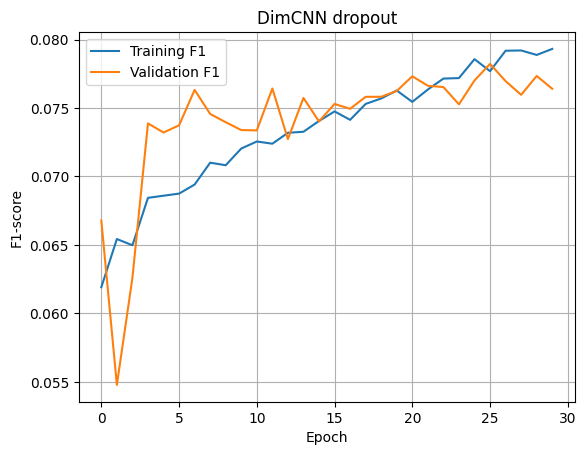

In [ ]:
import matplotlib.pyplot as plt

plt.plot(DimCNN_drop1_hist.history['f1_score'], label='Training F1')
plt.plot(DimCNN_drop1_hist.history['val_f1_score'], label='Validation F1')
plt.title("DimCNN dropout")
plt.xlabel("Epoch")
plt.ylabel("F1-score")
plt.legend()
plt.grid(True)
plt.show()



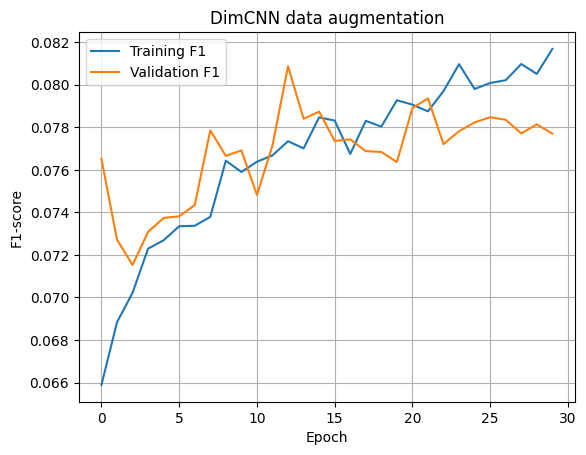

In [ ]:
plt.plot(DimCNN_aug1_hist.history['f1_score'], label='Training F1')
plt.plot(DimCNN_aug1_hist.history['val_f1_score'], label='Validation F1')
plt.title("DimCNN data augmentation")
plt.xlabel("Epoch")
plt.ylabel("F1-score")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("DimCNN_drop:")
DimCNN_drop1.evaluate(x_test, y_test, verbose=2)
DimCNN_drop1.evaluate(x_val, y_val, verbose=2)
print("\n")
print("DimCNN_aug:")
DimCNN_aug1.evaluate(x_test, y_test, verbose=2)
DimCNN_aug1.evaluate(x_val, y_val, verbose=2)
print("\n")

DimCNN_drop:
63/63 - 2s - 27ms/step - f1_score: 0.0835 - loss: 2.1232
47/47 - 0s - 4ms/step - f1_score: 0.0854 - loss: 2.0570


DimCNN_aug:
63/63 - 0s - 6ms/step - f1_score: 0.0890 - loss: 1.6694
47/47 - 0s - 5ms/step - f1_score: 0.0906 - loss: 1.6482




Συγκρίνοντας τα δύο μοντέλα συμπεραίνουμε ότι το μοντέλο με data augmentation (DimCNN_aug) πέτυχε καλύτερο F1-score σε validation και test set.Είχε επίσης μικρότερη απώλεια, που σημαίνει ότι έκανε πιο σωστές προβλέψεις.
Άρα, η τεχνική του data augmentation βοηθά το μοντέλο να μάθει καλύτερα και να γενικεύει σε νέα δεδομένα.

## Ερώτημα 3
---
### Βήμα 1: Μεταφορά γνώσης
Εφαρμόστε μεταφορά γνώσης (transfer learning) στο δικό σας μοντέλο (**MyCNN**), που αξιολογήσατε ως καλύτερο προς το F1 score στην αντιμετώπιση της υπερεκπαίδεσης.

Για το transfer learning, επιλέξτε το [VGG19](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19)  και το [EfficientNetB0](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/EfficientNetB0) για μεταφορά μάθησης.

α. "Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).  

β. Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

---
### Βήμα 2: Αξιολόγηση

Αξιολογήστε τα αποτελέσματά σας, βάσει του F1 score για το σύνολο επικύρωσης και για το σύνολο ελέγχου.

---

Θα χρησιμοποιήσω προεκπαιδευμένο δίκτυο και έτσι η γνώση θα κληρονομηθεί στο δικό μου μοντέλο.

In [ ]:
from tensorflow.keras.applications import VGG19
vgg19 = VGG19(include_top=False, input_shape=(32, 32, 3), weights='imagenet')

#Πάγωμα της βάσης
vgg19.trainable = False

cnn1 = tf.keras.Sequential([
        vgg19,
        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dropout(0.15),
        layers.Dense(64, activation = 'relu'),
        layers.Dropout(0.15),
        layers.Dense(20)
])

cnn1.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 1, 1, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,062,676 (76.53 MB)

 Trainable params: 38,292 (149.58 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(8500, 32, 32, 3)
(1500, 32, 32, 3)
(2000, 32, 32, 3)


In [ ]:
cnn1.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=[F1Score()])

history_vgg19_1 = cnn1.fit(x_train, y_train,
                           epochs=15, batch_size=128,
                           validation_data=(x_val, y_val))

Epoch 1/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - f1_score: 0.0710 - loss: 1.2349 - val_f1_score: 0.0723 - val_loss: 1.3168
Epoch 2/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - f1_score: 0.0716 - loss: 1.2235 - val_f1_score: 0.0723 - val_loss: 1.3164
Epoch 3/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - f1_score: 0.0720 - loss: 1.1916 - val_f1_score: 0.0721 - val_loss: 1.3046
Epoch 4/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - f1_score: 0.0717 - loss: 1.1472 - val_f1_score: 0.0725 - val_loss: 1.3085
Epoch 5/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - f1_score: 0.0719 - loss: 1.1538 - val_f1_score: 0.0720 - val_loss: 1.2961
Epoch 6/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - f1_score: 0.0713 - loss: 1.1417 - val_f1_score: 0.0730 - val_loss: 1.2976
Epoch 7/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - f1_score: 0.0718 - loss: 1.1172 - val_f1_score: 0.0721 - val_loss: 1.3026
Epoch 8/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - f1_score: 0.0713 - loss: 1.0900 - val_f1_score: 0.0720 - v

Τώρα θα κάνω fine-tuning, δηλαδή θα εκπαιδεύσω μέρος της συνελικτικής βάσης.

In [ ]:
vgg19 = tf.keras.applications.vgg19.VGG19(input_shape=(32,32,3), include_top=False)
for i, layer in enumerate(vgg19.layers):
  if i < 15:   #Παγώνω τα πρώτα 15 layers που είναι τα χαρακτηριστικά χαμηλού επιπέδου και ξεκλειδώνω τα πιο ειδικά επίπεδα.
    layer.trainable = False
  else:
    layer.trainable = True


cnn2 = tf.keras.Sequential([
        vgg19,
        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dropout(0.15),
        layers.Dense(64, activation = 'relu'),
        layers.Dropout(0.15),
        layers.Dense(20)
])

cnn2.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 1, 1, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,062,676 (76.53 MB)

 Trainable params: 11,837,332 (45.16 MB)

 Non-trainable params: 8,225,344 (31.38 MB)

In [ ]:

cnn2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[F1Score()])

history_vgg19_2 = cnn2.fit(x_train, y_train,
                    epochs=15, batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - f1_score: 0.0579 - loss: 2.9960 - val_f1_score: 0.0510 - val_loss: 2.9963
Epoch 2/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - f1_score: 0.0637 - loss: 2.9958 - val_f1_score: 0.0510 - val_loss: 2.9964
Epoch 3/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - f1_score: 0.0629 - loss: 2.9958 - val_f1_score: 0.0510 - val_loss: 2.9967
Epoch 4/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - f1_score: 0.0652 - loss: 2.9955 - val_f1_score: 0.0510 - val_loss: 2.9969
Epoch 5/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - f1_score: 0.0628 - loss: 2.9956 - val_f1_score: 0.0510 - val_loss: 2.9970
Epoch 6/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - f1_score: 0.0625 - loss: 2.9957 - val_f1_score: 0.0510 - val_loss: 2.9970
Epoch 7/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - f1_score: 0.0615 - loss: 2.9958 - val_f1_score: 0.0510 - val_loss: 2.9971
Epoch 8/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - f1_score: 0.0660 - loss: 2.9956 - val_f1_score: 0.0510 

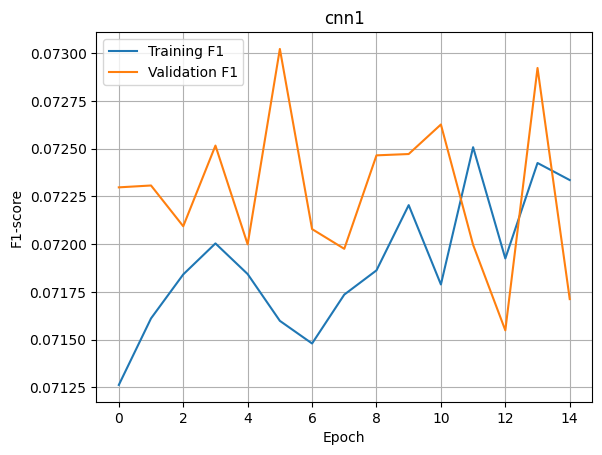

In [ ]:
plt.plot(history_vgg19_1.history['f1_score'], label='Training F1')
plt.plot(history_vgg19_1.history['val_f1_score'], label='Validation F1')
plt.title("cnn1")
plt.xlabel("Epoch")
plt.ylabel("F1-score")
plt.legend()
plt.grid(True)
plt.show()


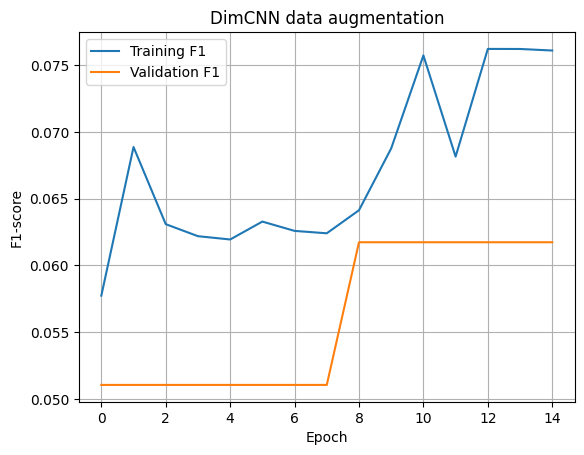

In [ ]:
plt.plot(history_vgg19_2.history['f1_score'], label='Training F1')
plt.plot(history_vgg19_2.history['val_f1_score'], label='Validation F1')
plt.title("cnn2")
plt.xlabel("Epoch")
plt.ylabel("F1-score")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("cnn1:")
cnn1.evaluate(x_test, y_test, verbose=2)
cnn1.evaluate(x_val, y_val, verbose=2)
print("\n")
print("cnn2:")
cnn2.evaluate(x_test, y_test, verbose=2)
cnn2.evaluate(x_val, y_val, verbose=2)
print("\n")

cnn1:
63/63 - 1s - 11ms/step - f1_score: 0.0850 - loss: 1.3403
47/47 - 0s - 10ms/step - f1_score: 0.0888 - loss: 1.3171


cnn2:
63/63 - 1s - 10ms/step - f1_score: 0.0744 - loss: 2.9959
47/47 - 0s - 10ms/step - f1_score: 0.0614 - loss: 2.9975




Από τα παραπάνω αποτελέσματα βλέπω ότι το μοντέλο cnn1 με παγωμένη συνελικτική βάση και εκπαιδευμένη μόνο κεφαλή ταξινόμησης — παρουσίασε καλύτερη απόδοση (F1-score: 0.0888 στο validation set).

Αντίθετα, το μοντέλο cnn2, στο οποίο έγινε fine-tuning των τελευταίων επιπέδων, παρουσίασε χαμηλότερα F1-scores και πολύ μεγαλύτερη απώλεια. Αυτό δείχνει ότι, στην παρούσα περίπτωση, η απλή μεταφορά γνώσης είναι πιο αποτελεσματική από την εκ νέου προσαρμογή της βάσης.

## Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούν να αναγνωστούν γραμμικά.

Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε σχετικά για το [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data).

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).
